In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price (3).csv


In [170]:
data = pd.read_csv('car_age_price.csv')

In [171]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [172]:
data.shape

(112, 2)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [174]:
data.isna().sum()

Year     0
Price    0
dtype: int64

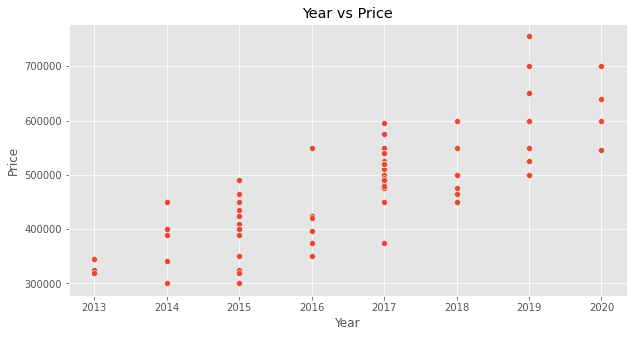

In [204]:
plt.figure(figsize=(10,5))

plt.title('Year vs Price')
sns.scatterplot(x=data['Year'],y=data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()


In [176]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


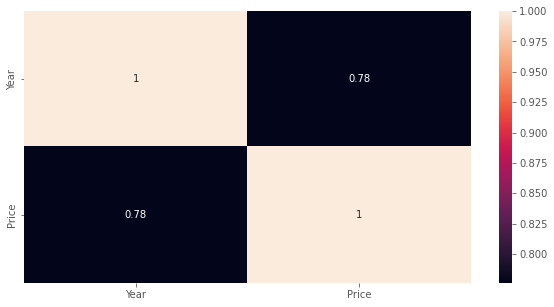

In [177]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True)

In [178]:
y = data['Price']
X= data.drop('Price',axis=1)

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
lr1 = LinearRegression()
model1 = lr1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [183]:
from sklearn.metrics import mean_squared_error, r2_score

In [184]:
print('MSE is',mean_squared_error(y_test,y_pred1))
print('R Squared value is: ',r2_score(y_test,y_pred1))

MSE is 4326906256.829671
R Squared value is:  0.36759313425902185


Text(0, 0.5, 'y_pred1')

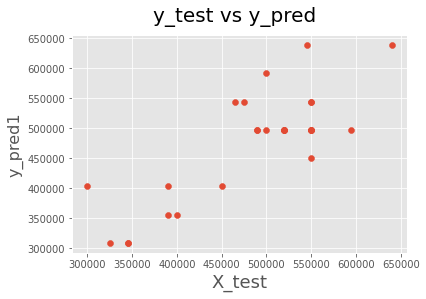

In [195]:
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('X_test', fontsize=18)                          
plt.ylabel('y_pred1', fontsize=16) 

# **Lasso regression**

In [186]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


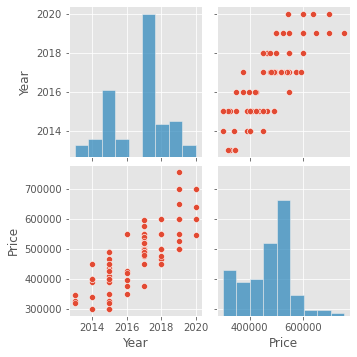

In [188]:
sns.pairplot(data)
plt.show()

In [189]:
x_train, x_test, y_train, y_test = train_test_split(
	data.iloc[:, :-1], data.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))


Train data shape of X = (84, 1) and Y = (84,) : 
Test data shape of X = (28, 1) and Y = (28,) : 


In [190]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Mean squared error on test set 2859223672.759848
  Columns  Coefficient Estimate
0    Year          47022.279649
